# Integration of Mechanical Systems

In this module, we will be exploring numerical integrators and how they perform on different mechanical systems.

## Simple Harmonic Oscillator

The simple harmonic oscillator is a simple physical system described by the second-order differential equation below. Despite its simplicity, this is a system that shows up in a similar form in many different fields of engineering. The same equation describes the behavior of a spring-mass-damper system, RLC circuit, or the motion of a (small-angle) pendulum.

![Image](figures/spring-mass-damper.png)

##### Figure 1. Diagram of Spring-Mass-Damper system (from https://en.wikipedia.org/wiki/Harmonic_oscillator)


The differential equation describing the motion of a simple harmonic oscillator is:

$$\begin{equation}
0 = m\ddot{x} + kx
\end{equation}$$

Since this is a second order system, we will need two states to accurately describe the system. We can use position $x$ and velocity $\dot{x}$. This is called the state vector $q$, as:

$$\begin{eqnarray}
\vec{q}  = \begin{bmatrix} x\\ \dot{x} \end{bmatrix}
\end{eqnarray}$$

This system can then be broken into two first order differential equations:

$$\begin{eqnarray}
\vec{\dot{q}}  = f(\vec{q}) = \begin{bmatrix} q_2\\ -\frac{k}{m}q_1 \end{bmatrix}
\end{eqnarray}$$

To look at the behavior of this system, we can start with some initial conditions for $q$, then use a numerical integration method such as Euler's method to integrate forward in time. This is equivalent to pulling (or pushing) on the spring, then letting go at t=0.

### Equations of Motion from Lagrangian

You are encouraged to follow this derivation ON PAPER on your own. The equations of motion are given above for a simple harmonic oscillator, but what if we didn't have this equation ahead of time? The following is a method that will work in nearly any situation to find equations of motion, often working well where a force analysis becomes difficult. This is especially good practice for anyone studying mechanics. To derive the equations of motion, we will start with the Lagrangian. This is defined by:

$$\begin{equation}
L = T- U
\end{equation}$$

where $T$ is the total Kinetic Energy in the system, and $U$ is the total Potential Energy. Potential energy in this system comes from the stretching or compressing of the spring, and is calculated as:

$$\begin{eqnarray*}
U &=& \frac{1}{2}kx^2\\
\end{eqnarray*}$$

Kinetic Energy in this system is from the motion of the mass, and is calculated as:

$$\begin{eqnarray*}
T &=& \frac{1}{2}mv^2 \\
&=& \frac{1}{2}m\dot{x}^2 
\end{eqnarray*}$$


So the Lagrangian quantity becomes:
$$\begin{equation}
L = \frac{1}{2}m\dot{x}^2  - \frac{1}{2}kx^2\\
\end{equation}$$




The equations of motion are then found using the Lagrange Equation:

$$\begin{equation}
\frac{d}{dt} \left( \frac{\partial L}{\partial \dot{x_i}}\right) - \frac{\partial L}{\partial x_i} = 0
\end{equation}$$

Since we have only one generalized coordinate (position), we need only one equation of motion. We'll calculate this in steps:

$$\begin{eqnarray*}
\frac{\partial L}{\partial \dot{x}} &=& m\dot{x} \\
\frac{d}{dt} \left( \frac{\partial L}{\partial \dot{x}}\right) &=& m\ddot{x}\\
-\frac{\partial L}{\partial x} &=& + kx
\end{eqnarray*}$$

We can add together the second and third equations to find the first equation of motion. Some of these terms will cancel out, and we are left with a final equation of motion:

$$\begin{equation}
0 = m\ddot{x} + kx
\end{equation}$$

This is the same equation we have before! So, we can be relatively confident that this derivation is correct.

## Integration Methods

### Euler's method

Euler's method is discussed in lesson 1 of the Numerical Methods course. The method goes as follows:
$$x_i^{n+1} = x_i^n + h\dot{x}_i^n$$

where $h$ is the timestep. This isn't a complicated scheme, so for details see the code below.

### Runge-Kutta Integration (RK4)

Depending on the application, Euler's method may provide enough accuracy with a small timestep, especially a simple harmonic oscillator. However, Euler is a first-order method and we can do better. One option is a Runge-Kutta scheme. This is a popular numerical integration method which is easily extended to higher orders. Here we will use a fourth order Runge-Kutta, also called RK4:

$$\begin{equation}
q_i^{n+1} = q_i^n + \frac{h}{6}\left(k_1+2k_2+2k_3+k_4\right)
\end{equation}$$
where
$$\begin{eqnarray}
k_1 &=& f(t_n, x_n)\\
k_2 &=& f(t_n+\frac{h}{2}, x_n+\frac{h}{2}k_1)\\
k_3 &=& f(t_n+\frac{h}{2}, x_n+\frac{h}{2}k_2)\\
k_4 &=& f(t_n+h, y_n+hk_3)\\
t_{n+1} &=& t_n + h
\end{eqnarray}$$

For more information on the Runge-Kutta method, including the derivation and explanation of coefficients, see (cite)


### Symplectic Integrators

Symplectic integrators are similar to the methods discussed above, but they use equations of motion derived from Hamiltonian mechanics. According to [5], syplectic integrators preserve the conserved Hamiltonian quantities. In practical terms, this works out to mean the methods reflect conservation of energy, down to a truncation error.

The Hamiltonian equations of motion can be derived from the total energy in the system, much like the Lagrangian. The coordinates we use are position ($q$) and momentum ($p = m\dot x$). The Hamiltonian is:
$$ H = T+V$$
where $T$ is the kinetic energy in the system, and $V$ is the potential energy in the system. So, we get:
$$\begin{eqnarray*}
T &=& \frac{1}{2}m\dot{x}^2 = \frac{p^2}{2m}\\
V &=& \frac{1}{2}k{x}^2 = \frac{kq^2}{2} 
\end{eqnarray*}$$

and 

$$H = \frac{p^2}{2m} + \frac{kq^2}{2}$$



The Hamilton's equations are:
$$\begin{eqnarray*}
\frac{dq}{dt} &=& -\frac{\partial H}{\partial p}\\
\frac{dp}{dt} &=& \frac{\partial H}{\partial q}
\end{eqnarray*}$$

So our equations of motion become:
$$\begin{equation*}
\begin{bmatrix} \dot q \\ \dot p \end{bmatrix} = \begin{bmatrix} -\frac{\partial H}{\partial p}\\ \frac{\partial H}{\partial q} \end{bmatrix} = \begin{bmatrix} -\frac{p}{m} \\ kq\end{bmatrix}
\end{equation*}$$

Let's now take a look at symplectic integration methods [7]. We'll start with a first order method - symplectic Euler's method. This uses the equations:

$$\begin{eqnarray*}
p_{n+1} = p_n - h \frac{\partial H}{\partial q} \Bigr|_{p_{n+1},q_n}\\
q_{n+1} = q_n + \frac{h}{2} \frac{\partial H}{\partial p} \Bigr|_{p_{n+1},q_n}
\end{eqnarray*}$$

We can then plug in the partial derivatives and integrate the system. This system will do a better job of conserving energy than Euler's method (we'll investigate this later), $\textit{but only to a truncation error.}$  Again, we can do better than first-order. Let's try a second-order symplectic scheme, also called Verlet integration. We'll have the same equations of motion, but this time a different set of integration equations [6]:

$$\begin{eqnarray*}
p_{n+1/2} &=& p_n - \frac{h}{2} \frac{\partial H}{\partial q} \Bigr|_{p_{n+1/2},q_n}\\
q_{n+1} &=& q_n + \frac{h}{2} \left(\frac{\partial H}{\partial p} \Bigr|_{p_{n+1/2},q_n} +  \frac{\partial H}{\partial p} \Bigr|_{p_{n+1/2},q_{n+1/2}} \right) \\
p_{n+1} &=& p_{n+1/2} - \frac{h}{2} \frac{\partial H}{\partial q}\Bigr|_{p_{n+1/2},q_{n+1/2}}
\end{eqnarray*}$$

### Analytical Solution
The simple harmonic oscillator is a nice example for numerical integration, because it has an analytical form which we can compare to. The analytical solution is

$$\begin{equation}
x(t) = Acos(\omega_n t + \phi)
\end{equation}$$

where $\omega_n$ is the natural frequency of the system given by $\omega_n = \sqrt{\frac{k}{m}}$ . The amplitude, $A$, and the phase, $\phi$, of oscillation are determined from the initial conditions. 

### Let's Get to Programming

In [1]:
import numpy
from scipy.linalg import solve
from numpy.linalg import det
from math import pi, cos, sin, sqrt

from matplotlib import pyplot
from matplotlib.pyplot import quiver
%matplotlib notebook
from matplotlib import rcParams, cm
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [2]:
#Set up system parameters:
m = 12
k = 150

T = 25; #[seconds]
dt = .02; #time step size
N = int(T/dt)+1 #number of time steps
t = numpy.linspace(0.0, T, N) #array of time values

In [3]:
def euler(u, f, dt):
    """ Euler's method for integrating a system of differential equations.
    
    Parameters:
        u - state at current step 
        f - RHS of equation
        dt- time step size
    
    Returns: 
        x - array of values at next time step.
    """
    
    return u + dt*f(u)    

In [4]:
def RK2(u, f, dt):
    """Runge Kutta fourth order integration method
    
    Parameters:
        u - state of the system at time t
        f - function for RHS of state equations
        dt - time step
        
    Returns: 
        state values at next time step.
    """
    k1 = u + 0.5*dt*f(u)
    k2 = u + dt*f(k1)
    return k2

In [5]:
def RK4(u, f, dt):
    """Runge Kutta fourth order integration method
    
    Parameters:
        u - state of the system at time t
        f - function for RHS of state equations
        dt - time step
        
    Returns: 
        state values at next time step.
    """
    k1 = dt*f(u)
    k2 = dt*f(u+ k1/2)
    k3 = dt*f(u + k2/2)
    k4 = dt*f(u + k3)
    
    return u + 1/6*(k1 + 2*k2 + 2*k3 + k4)

In [6]:
def f_harmonic_oscillator(u):
    """Returns RHS of harmonic oscillator EOM
    
    Parameters:
        u - initial state
    
    Returns:
        RHS of harmonic oscillator eqn.
    
    """
    pos = u[0]
    vel = u[1]
    
    return numpy.array([vel, -k/m*pos])

In [15]:
def verlet_SHM(u, dt):
    """ Verlet integration for integrating from Hamiltonian equations of motion
            for a simple harmonic oscillator
    Parameters:
        u - state at current time step
        dt - time step size
    Returns: 
        state at next time step.
    """
    pos = u[0]
    mom = u[1]
    
    q_half = pos - dt/2*mom/m
    #p_half = mom + dt/2*(k*pos)
    
    p = mom + dt/2*(2*k*q_half)
    q = q_half - dt/2*p/m
    
    return numpy.array([q, p]) 

In [16]:
#Initial Conditions
x0 = 0.5 #[m]
xdot0 = 0 #[m/s]

#Equivalent initial conditions for the Hamiltonian system
q0 = x0
p0 = m*xdot0

x_init = numpy.array([x0, xdot0])
x_init_H = numpy.array([q0, p0])

<IPython.core.display.Javascript object>


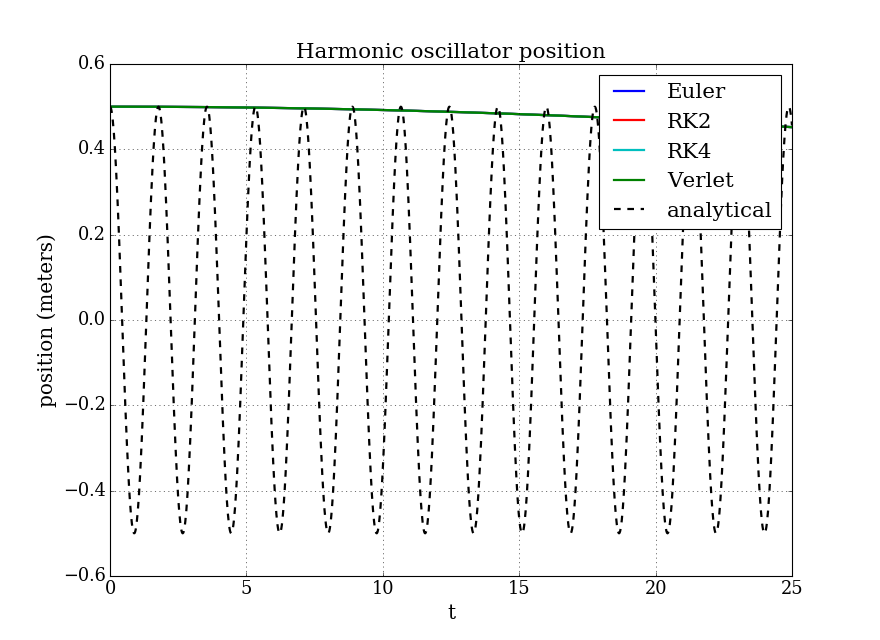

In [17]:
#Euler Integration
x1 = numpy.zeros((N,2)) #initialize array
x1[0] = x_init.copy() #set initial conditions
for n in range(N-1):  #integrate with Euler
    x1[n+1] = euler(x1[n], f_harmonic_oscillator, dt)
    #print(q1[n])
    
#Runge-Kutta Integration Second Order
x2 = numpy.zeros((N,2))
x2[0] = x_init.copy()
for n in range(N-1):
    x2[n+1] = RK2(x2[n], f_harmonic_oscillator, dt)


#Runge-Kutta Integration Fourth Order
x4 = numpy.zeros((N,2))
x4[0] = x_init.copy()
for n in range(N-1):
    x4[n+1] = RK4(x4[n], f_harmonic_oscillator, dt)
    
    
#Symplectic Integration
xv = numpy.zeros((N,2))
xv[0] = x_init_H.copy()
for n in range(N-1):
    xv[n+1] = verlet_SHM(xv[n],  dt)

#Analytical Solution    
A = x0 #with no forcing and no initial velocity, the max amplitude is equal to initial amplitude
phi = 0
omega = sqrt(k/m)
x_analytical = A*numpy.cos(omega*t + phi)
#analytical velocity:
vel_analytical = -A*omega*numpy.sin(omega*t + phi)
    
pyplot.figure(figsize=(11,8));
pyplot.grid(True);
pyplot.xlabel(r't', fontsize=18);
pyplot.ylabel(r'position (meters)', fontsize=18);
pyplot.title('Harmonic oscillator position');
pyplot.plot(t, x1[:,0], lw=2, label='Euler');
pyplot.plot(t, x2[:,0], 'r', lw=2, label='RK2');
pyplot.plot(t, x4[:,0], 'c', lw=2, label='RK4');
pyplot.plot(t, xv[:,0], 'g', lw=2, label='Verlet');
pyplot.plot(t, x_analytical, 'k--', lw=2, label='analytical');
pyplot.legend();

If we look closely at the plot, we can see that Verlet and Runge-Kutta integration are close to each other, but something is clearly off with Euler's method. But how close are these methods to the analytical solution? Does Verlet do any better than we expect? In this case it is obvious that Euler is not correct (and possibly unstable). One thing to check is whether the behavior changes as we change our time step size. Maybe the timestep is too large to capture some aspect of the system response.

### Error Analysis
The error analysis code below is based on the numerical methods MOOC notebook on phugoid oscillation. 

In [12]:
def get_error(y, z, dt):
    """Returns error relative to analytical solution using L-1 norm.
    
    Parameters:
        y - numerical solution
        z - analytical solution
        dt - time step size
    
    Returns:
        error - L_1 norm of the error W.R.T. analytical solution    
    """
    err = dt*numpy.sum(numpy.abs(y-z))
    return err

In [13]:
dt_values = numpy.array([0.1, 0.05, 0.01, 0.005, 0.001, 0.0001])

Euler_error_values = numpy.zeros_like(dt_values)
RK2_error_values = Euler_error_values.copy()
RK4_error_values = Euler_error_values.copy()
Verlet_error_values = Euler_error_values.copy()
for i, dt in enumerate(dt_values):
    ###Call error function
    Euler_error_values[i] = get_error(x1[:,0], x_analytical, dt)
    RK2_error_values[i] = get_error(x2[:,0], x_analytical, dt)
    RK4_error_values[i] = get_error(x4[:,0], x_analytical, dt)
    Verlet_error_values[i] = get_error(xv[:,0], x_analytical, dt)
    


<IPython.core.display.Javascript object>


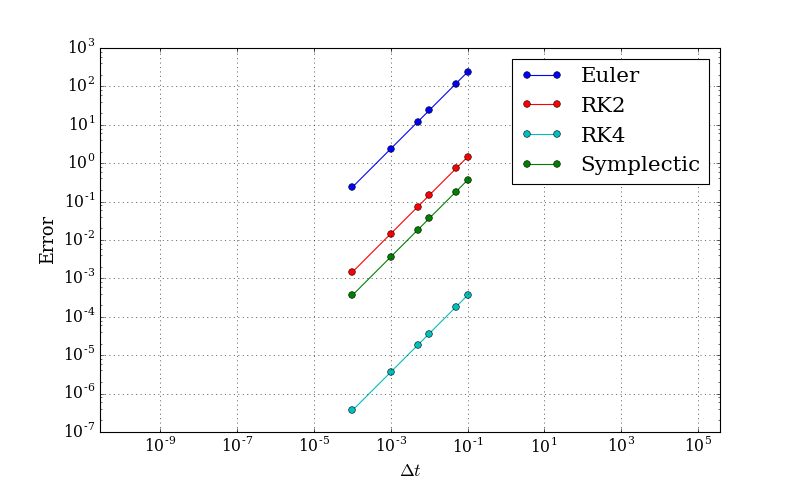

In [14]:
pyplot.figure(figsize=(10,6))
pyplot.tick_params(axis='both', labelsize=14)
pyplot.grid(True)
pyplot.xlabel('$\Delta t$', fontsize=16)
pyplot.ylabel('Error', fontsize=16)
pyplot.loglog(dt_values, Euler_error_values, 'bo-', label='Euler')
pyplot.loglog(dt_values, RK2_error_values, 'ro-', label='RK2')
pyplot.loglog(dt_values, RK4_error_values, 'co-', label='RK4')
pyplot.loglog(dt_values, Verlet_error_values, 'go-', label='Symplectic')
pyplot.axis('equal')
pyplot.legend();

Is this what you would expect to see based on the plots of position above? What are the sources of this error? We have the usual suspects: truncation error, discretization error, possible precision errors. Don't believe that these are significant? The discretization is the only difference between the first two plots above, and with a smaller time step the response from Runge-Kutta and Euler are greatly improved. To exame precision errors, take a look at the following screenshot, which shows the plots above, built with identical code on two different computers. The responses on the left are from a 64-bit computer, and the responses on the right are from a 32-bit computer. Look closely at the phase shift in the system response. That's a huge difference! Even the precision of the machine can have a significant impact on numerical integration.

![Image](figures/combined_response.png)

![Image](figures/error_combined.png)
 # FIX THESE IMAGES

Despite the numerical errors, why is one second order scheme (Verlet) outperforming another (RK2) by so much? What is going on? We can check the order of convergence to make sure that these schemes are actually 2nd order.

/home/mint/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:24: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


<IPython.core.display.Javascript object>


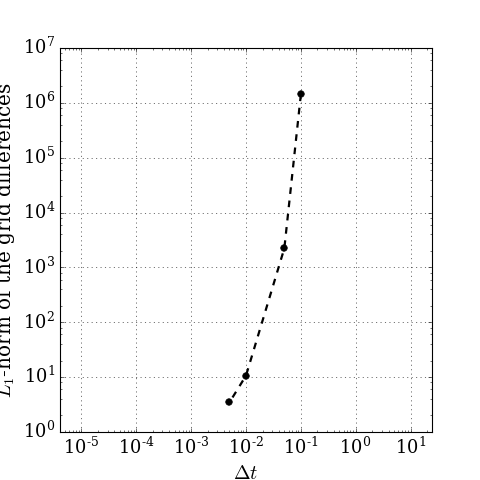

In [65]:
def get_diffgrid(u_current, u_fine, dt):
    """Returns the difference between one grid and the fine one using L-1 norm.
    
    Parameters
    ----------
    u_current : array of float
        solution on the current grid.
    u_finest : array of float
        solution on the fine grid.
    dt : float
        time-increment on the current grid.
    
    Returns
    -------
    diffgrid : float
        difference computed in the L-1 norm.
    """
    
    N_current = len(u_current[:,0])
    N_fine = len(u_fine[:,0])
   
    grid_size_ratio = numpy.ceil(N_fine/N_current)
    
    diffgrid = dt * numpy.sum( numpy.abs(\
            u_current[:,0]- u_fine[::grid_size_ratio,0])) 
    
    return diffgrid

# use a for-loop to compute the solution on different grids - this code is modified from Numerical MOOC lesson 1 module 4
dt_values = numpy.array([0.1, 0.05, 0.01, 0.005, 0.001])
u1_values = numpy.empty_like(dt_values, dtype=numpy.ndarray)
u2_values = u1_values.copy()
u4_values = u1_values.copy()
uv_values = u1_values.copy()

#At each value of dt, integrate the system using 4 different methods from t=0 to T
for i, dt in enumerate(dt_values):
    N = int(T/dt)+1    
    t = numpy.linspace(0.0, T, N)
    u1 = numpy.empty((N,2))
    u1[0] = numpy.array([x0, xdot0])
    u2 = u1.copy()
    u4 = u1.copy()
    uv = u1.copy()
    for n in range(N-1):
        u1[n+1] = euler(u1[n], f_harmonic_oscillator, dt)
        u2[n+1] = RK2(u2[n], f_harmonic_oscillator, dt)
        u4[n+1] = RK4(u4[n], f_harmonic_oscillator, dt)
        uv[n+1] = verlet_SHM(uv[n], dt)
    # store the value of u related to one grid
    u1_values[i] = u1
    u2_values[i] = u2
    u4_values[i] = u4
    uv_values[i] = uv
    
# compute diffgrid
diffgrid1 = numpy.empty_like(dt_values)
diffgrid2 = diffgrid1.copy()
diffgrid4 = diffgrid1.copy()
diffgridv = diffgrid1.copy()
for i, dt in enumerate(dt_values):
    diffgrid1[i] = get_diffgrid(u1_values[i], u1_values[-1], dt)
    diffgrid2[i] = get_diffgrid(u2_values[i], u2_values[-1], dt)
    diffgrid4[i] = get_diffgrid(u4_values[i], u4_values[-1], dt)
    diffgridv[i] = get_diffgrid(uv_values[i], uv_values[-1], dt)

<IPython.core.display.Javascript object>


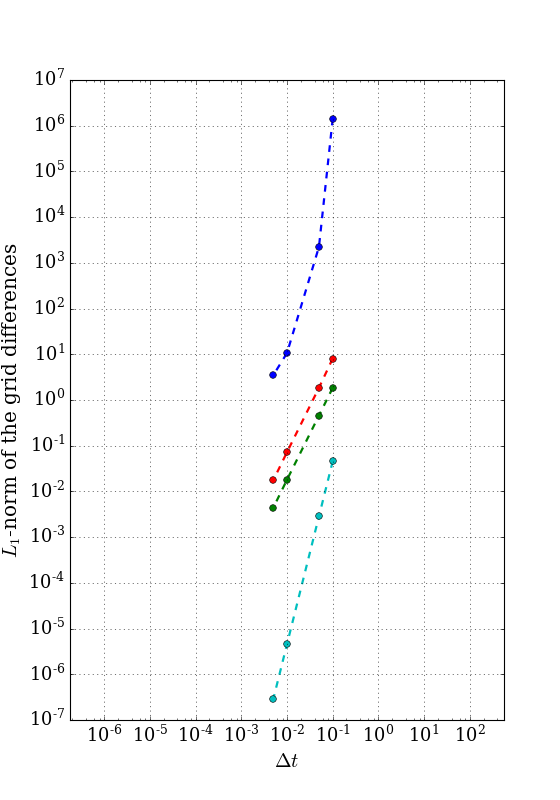

In [70]:
# plot using the matplotlib function loglog()
pyplot.figure(figsize=(7,10))
pyplot.grid(True)
pyplot.xlabel(r'$\Delta t$', fontsize=18)
pyplot.ylabel(r'$L_1$-norm of the grid differences', fontsize=18)
pyplot.xlim(1e-4,1)
pyplot.ylim(1e-4,1)
pyplot.axis('equal')
pyplot.loglog(dt_values[:-1], diffgrid1[:-1], label='Euler', color='b', ls='--', lw=2, marker='o');
pyplot.loglog(dt_values[:-1], diffgrid2[:-1], label='RK2', color = 'r', ls='--', lw=2, marker='o');
pyplot.loglog(dt_values[:-1], diffgrid4[:-1], label='RK4', color = 'c', ls='--', lw=2, marker='o');
pyplot.loglog(dt_values[:-1], diffgridv[:-1], label='Verlet', color = 'g', ls='--', lw=2, marker='o');

So yes, Verlet and RK2 both exhibit second order convergence as we expected. RK4 integration looks like fourth order. Euler integration looks weird. It appears to get exponentially worse with the time discretization. What is going on? One explanation is that there is some behavior that the first order method of Euler integration fails to capture.

In the plots of position using Euler integration, we notice that the spring is stretched farther and farther each oscillation. This means it has more and more potential energy. With no outside forces adding energy to the system and no friction to remove energy, Conservation of Energy says that value should be constant! Let's take a look at total energy in the system. Since we derived equations of motion from the Lagrangian, this should be easy! All we need to do is calculate kinetic and potential energy at each time step, and we already have the information we need to do this. 

In [71]:
def get_Energy(u):
    """ Calculates total energu in the system at given time step for a simple harmonic oscillator
    Parameters:
        u - state of system  [pos, vel]
    Returns:
        total energy in system.
    """
    pos = u[0]
    vel = u[1]
    T = 0.5*m*vel**2
    V = 0.5*k*pos**2
    
    return T+V

In [78]:
#redefine t
T = 25; #[seconds]
dt = .02; #time step size
N = int(T/dt)+1 #number of time steps
t = numpy.linspace(0.0, T, N) #array of time values

#Total energy calculation
Euler_energy = numpy.empty_like(t)
RK2_energy = numpy.empty_like(t)
RK4_energy = numpy.zeros_like(t)
Verlet_energy = numpy.zeros_like(t)
#Verlet total energy
#Here we will convert from momentum to velocity so we can use the same get_energy function.
#Momemtum (q) is mass*velocity.
Verlet_vel = x3[:,1]/m
#analytic total energy
analytical_energy = numpy.zeros_like(t)
anayltical_state = numpy.array([x_analytical, vel_analytical]).T

for i in range(N):
    Euler_energy[i] = get_Energy(x1[i,:])
    RK2_energy[i] = get_Energy(x2[i,:])
    RK4_energy[i] = get_Energy(x4[i,:])
    Verlet_energy[i] = get_Energy(numpy.array([xv[i,0], Verlet_vel[i]]))
    analytical_energy[i] = get_Energy(anayltical_state[i,:])    

<IPython.core.display.Javascript object>


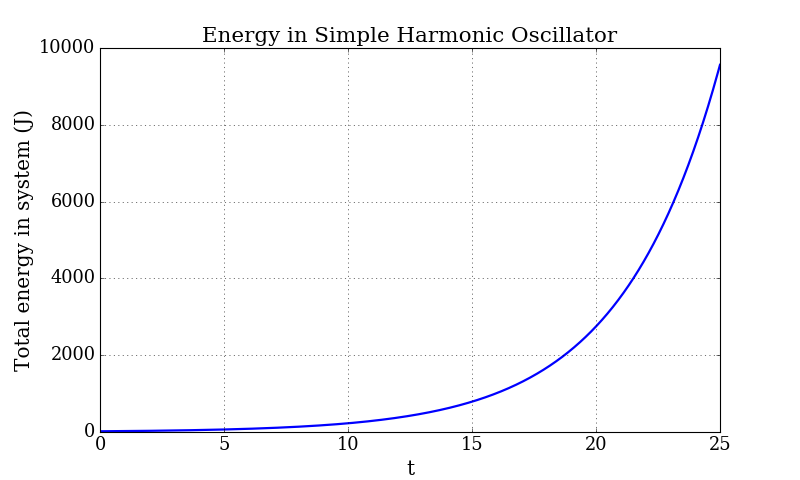

<IPython.core.display.Javascript object>


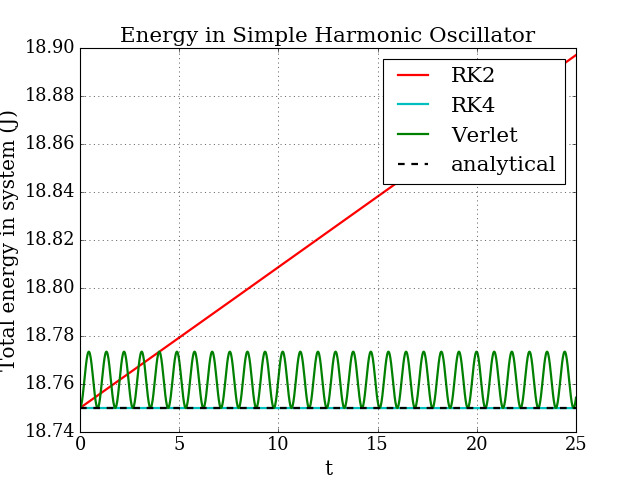

In [83]:
#Plot Euler on its own, because it is orders of magnitude higher
pyplot.figure(figsize=(10,6));
pyplot.grid(True);
pyplot.xlabel(r't', fontsize=18);
pyplot.ylabel(r'Total energy in system (J)', fontsize=18);
pyplot.title('Energy in Simple Harmonic Oscillator');
pyplot.plot(t, Euler_energy, 'b-', lw=2, label='Euler');

#Plot other methods on a separate figure, so we can actually see behavior
pyplot.figure(figsize=(8,6));
pyplot.grid(True);
pyplot.xlabel(r't', fontsize=18);
pyplot.ylabel(r'Total energy in system (J)', fontsize=18);
pyplot.title('Energy in Simple Harmonic Oscillator');

pyplot.plot(t, RK2_energy, 'r-', lw=2, label='RK2' )
pyplot.plot(t, RK4_energy, 'c-', lw=2, label='RK4');
pyplot.plot(t, Verlet_energy, 'g-', lw=2, label='Verlet');
pyplot.plot(t, analytical_energy, 'k--', lw=2, label='analytical');
pyplot.legend();

It looks like Euler integration is adding a significant amount of energy to the system.

The really interesting  results come from the other integrators. RK2 continuously adds energy to the system. Our symplectic integrator looks like it may be oscillating, but the energy in the system is stable! Maybe all of that work deriving the equations of motion was worth it! We now know that the Hamiltonian equations do better with Conservation of Energy, and this can make a big difference even in a simple system. 

## Adding a damping term

A more realistic oscillator also has a damping term. This might correspond to friction, or to some other non-conservative force. For now, we will assume that the damping is linear, and is proportional to the velocity (this is called the viscous damping model of friction). We get the following equation of motion:

$$\begin{equation*}
0 = m\ddot{x} + c\dot{x} + kx
\end{equation*}$$

This gives us the differential equations:
$$\begin{eqnarray*}
\vec{\dot{q}}  = f(\vec{q}) = \begin{bmatrix} q_2\\ -\frac{c}{m}\dot{q_1} -\frac{k}{m}q_1 \end{bmatrix}
\end{eqnarray*}$$

We can define a damping ratio, $\zeta = \frac{c}{2m\omega_n} \geq 0$, to express how large the damping is relative to the other system parameters. This differential equation has several types of solutions, depending on the damping ratio. These lead to a few different behaviors:

1. Undamped $\zeta =0$ - This is simple harmonic motion, which we have already examined
2. Underdamped $\zeta < 1$ - The system will oscillate, but will lose energy over time. We will assume this case for the rest of this notebook, since it leads to the most interesting results.
3. Critically damped $\zeta = 1$ - A special case which will lead to no oscillation (the system may overshoot its equilibrium position one time, but it won't oscillate)  
4. Overdamped $\zeta>1$ - This system will lead to no oscillation




Euler's method and Runge-Kutta integration work the same way as in simple harmonic motion. We also have a new analytical solution. Assuming the system is underdamped (which we will do from here on out), the solution becomes:


$$\begin{equation}
x(t) = Acos(\omega_d t + \phi)
\end{equation}$$

where $\omega_d = \omega_n\sqrt{1 - \zeta^2}$ is called the damped natural frequency.

The big change comes in the Hamiltonian equations. If these are dependent on convservation of energy, how do we deal with a system where energy is not conserved?

Our first step is to re-examine the Lagrangian. Since losses due to friction are neither potential nor kinetic energy, we'll need a new term. The Lagrangian equation of motion with non-conservative forces is:

$$\begin{equation}
\frac{d}{dt} \left( \frac{\partial L}{\partial \dot{x_i}}\right) - \frac{\partial L}{\partial x_i} = Q
\end{equation}$$

where $Q$ is the sum of all non-conservative forces. In this case, 
$$Q = c\frac{\partial x}{\partial t}$$

Now that we have this, we can add a similar term to the Hamiltonian equations of motion to deal with the same problem. For more information on the derivation of the Hamiltonian from the Lagrangian, see Tveter (cite). The Hamiltonian equations of motion become:

$$\begin{equation*}
\begin{bmatrix} \dot q \\ \dot p \end{bmatrix} = \begin{bmatrix} -\frac{\partial H}{\partial p} + Q\\ \frac{\partial H}{\partial q} \end{bmatrix} = \begin{bmatrix} -\frac{p}{m} - \frac{c}{m}p \\ kq \end{bmatrix}
\end{equation*}$$

From here, the we can use the same Verlet integration method as before. If this explanation has too much hand-waving for you, please see [7].

In [84]:
def f_damped_HM(x):
    """Returns RHS of damped harmonic oscillator EOM
    
    Parameters:
        q - initial state
    
    Returns:
        f - RHS of harmonic oscillator eqn.
    
    """
    pos = x[0]
    vel = x[1]
    
    return numpy.array([vel, -k/m*pos -c/m*vel])

In [85]:
def Verlet_damped_HM(u, dt):
    """ Verlet integration for integrating from Hamiltonian equations of motion
            for a damped harmonic oscillator
    Parameters:
        u - state at current time step
        dt - time step size
    Returns: state at next time step.
    """
    pos = u[0]
    mom = u[1]
    
    q_half = pos - dt/2*(mom/m)
    #q_half = mom + dt/2*(k*pos)
    
    p = mom + dt*(k*q_half - c/m*mom)
    q = q_half - dt/2*(p/m)
    
    return numpy.array([q, p]) 
    

In [86]:
#Set up parameters:
m = 12
k = 75;
T = 25; #[seconds]
dt = .02; #
N = int(T/dt)+1
t = numpy.linspace(0.0, T, N)

#Initial Conditions
x0 = 1 #[m]
xdot0 = 0 #[m/s]

q0 = x0
p0 = m*xdot0

x_init = numpy.array([x0, xdot0])
x_init_H = numpy.array([q0, p0])
zeta = 0.1 #[N/(m/s)]
wn = sqrt(k/m)
wd = wn*sqrt(1-zeta**2)
c = zeta*2*m*wn

<IPython.core.display.Javascript object>


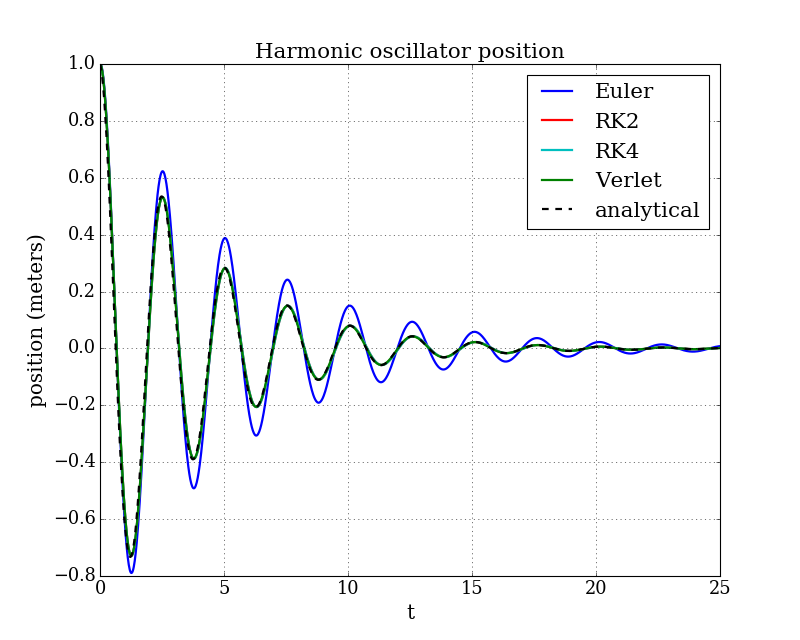

In [91]:
#Euler
x1_d = numpy.zeros((N,2)) 
x1_d[0] = x_init.copy() #set initial conditions
#Runge-Kutta Second Order
x2_d = x1_d.copy()
#Runge-Kutta Fourth Order
x4_d= x1_d.copy()
#Symplectic Second Order
xv_d = x1_d.copy()

for n in range(N-1):  #integrate with Euler
    x1_d[n+1] = euler(x1_d[n], f_damped_HM, dt)
    x2_d[n+1] = RK2(x2_d[n], f_damped_HM, dt)
    x4_d[n+1] = RK4(x4_d[n], f_damped_HM, dt)
    xv_d[n+1] = Verlet_damped_HM(xv_d[n],  dt)
    
#Analytical Solution    
A = x0 #with no forcing, the max amplitude is equal to initial amplitude
phi = 0
x_d_analytical = A*numpy.exp(-zeta*wn*t)*numpy.cos(wd*t + phi)
vel_d_analytical = -A*numpy.exp(-zeta*wn*t)*wd*numpy.sin(wd*t+phi)
    
pyplot.figure(figsize=(10,8));
pyplot.grid(True);
pyplot.xlabel(r't', fontsize=18);
pyplot.ylabel(r'position (meters)', fontsize=18);
pyplot.title('Harmonic oscillator position');
pyplot.plot(t, x1_d[:,0], lw=2, label='Euler');
pyplot.plot(t, x2_d[:,0], 'r-', lw=2, label='RK2');
pyplot.plot(t, x4_d[:,0], 'c-', lw=2, label='RK4');
pyplot.plot(t, xv_d[:,0], 'g', lw=2, label='Verlet');
pyplot.plot(t, x_d_analytical, 'k--', lw=2, label='analytical');
pyplot.legend();


How does each integrator perform compared to the case of simple harmonic motion? Just by looking at the system response, it seems like the error is actually better here. Why is that? It is important to note here that the integrators perform differently for different system models. This is part of why we study numerical methods! There isn't a single answer to which scheme to use, it is dependent on the characteristics of both the scheme and the system mode.

The effect of the damper is to remove energy from the system. So, in this case the damping term is helping to remove some energy from the system that the integration adds. As time goes to infinity, these solutions will converge, and the Euler and Runge-Kutta methods are stable. We can again look at the energy in the system according to each method. 



<IPython.core.display.Javascript object>


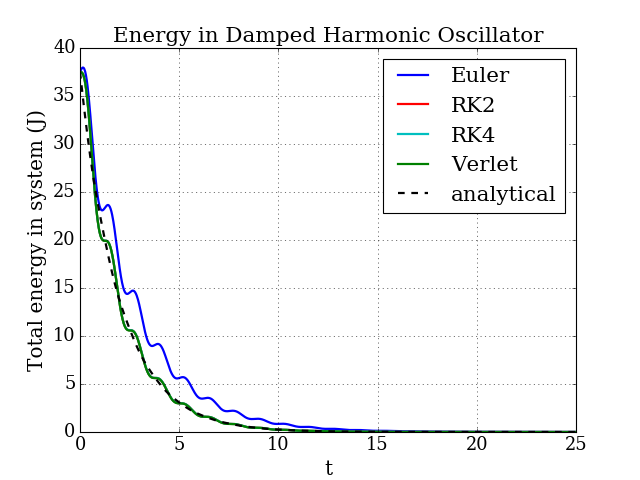

In [95]:
#Euler total energy
Euler_energy_d = numpy.empty_like(t)
RK2_energy_d = numpy.empty_like(t)
RK4_energy_d = numpy.empty_like(t)
#Verlet total energy
#Here we will convert from momentum to velocity so we can use the same get_energy function.
#Momemtum (q) is mass*velocity.
Verlet_energy_d = numpy.empty_like(t)
Verlet_vel_d = xv_d[:,1]/m

for i in range(N):
    Euler_energy_d[i] = get_Energy(x1_d[i,:])
    RK2_energy_d[i] = get_Energy(x2_d[i,:])
    RK4_energy_d[i] = get_Energy(x4_d[i,:])
    Verlet_energy_d[i] = get_Energy(numpy.array([xv_d[i,0], Verlet_vel_d[i]]))

#analytic total energy
analytical_energy_d = numpy.zeros_like(t)
anayltical_state_d = numpy.array([x_d_analytical, vel_d_analytical]).T
for i in range(N):
    analytical_energy_d[i] = get_Energy(anayltical_state_d[i,:])
    
pyplot.figure(figsize=(8,6));
pyplot.grid(True);
pyplot.xlabel(r't', fontsize=18);
pyplot.ylabel(r'Total energy in system (J)', fontsize=18);
pyplot.title('Energy in Damped Harmonic Oscillator');
pyplot.plot(t, Euler_energy_d, lw=2, label='Euler');
pyplot.plot(t, RK2_energy_d, 'r-', lw=2, label='RK2');
pyplot.plot(t, RK4_energy_d, 'c-', lw=2, label='RK4');
pyplot.plot(t, Verlet_energy_d, 'g', lw=2, label='Verlet');
pyplot.plot(t, analytical_energy_d, 'k--', lw=2, label='analytical');
pyplot.legend();

We can see some oscillations in the total energy, which come from the discretization error. Overall, we see that Verlet and the Runge-Kutta methods perform better here than Euler (although not perfectly - it does have induced oscillations from the damping term), but just like the analytical solution the energy in the system asymptotically approaches zero.


### Phase Portrait

Another way to investigate stability is with a phase plot. Instead of position vs. time, we can plot velocity vs. position. This plot is in phase space (a subset of state space). For any given state (position and velocity), we should be able to determine what the next state will be. This gives us an entire direction field, over which we can plot the actual behavior of the system to see if they match up. If the phase plot becomes repetitive, we can call it stable, and if the phase plot goes to the origin, we can call it asymptotically stable.

<IPython.core.display.Javascript object>


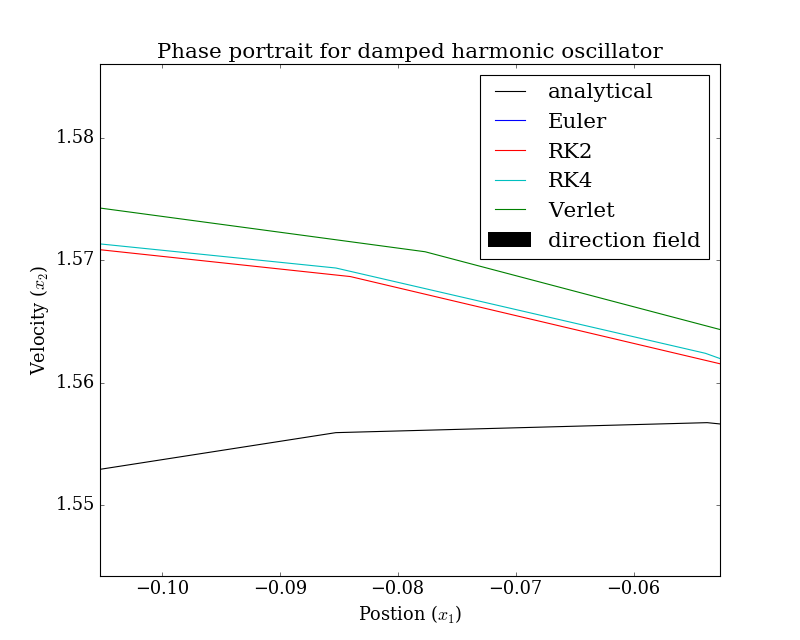

In [96]:
#create a phase plot
NP = 15
pos = numpy.linspace(-x0, x0, NP)
vel = numpy.linspace(-2*x0, 2*x0, NP)

X1, X2 = numpy.meshgrid(pos, vel)
u = numpy.zeros_like(X1)
v = numpy.zeros_like(X2)

for i in range(NP):
    for j in range(NP):
        x = X1[i, j]
        y = X2[i, j]
        yprime = f_damped_HM([x, y])
        u[i,j] = yprime[0]
        v[i,j] = yprime[1]


pyplot.figure(figsize=(10,8));
pyplot.quiver(X1, X2, u, v, pivot='mid', color='k', label='direction field');
pyplot.plot(x_d_analytical, vel_d_analytical, 'k-', label='analytical');
pyplot.plot(x1_d[:,0], x1_d[:,1],'b-', label='Euler');
pyplot.plot(x2_d[:,0], x2_d[:,1], 'r-', label='RK2');
pyplot.plot(x4_d[:,0], x4_d[:,1], 'c-', label='RK4');
pyplot.plot(xv_d[:,0], -Verlet_vel_d, 'g-', label='Verlet');
pyplot.xlabel('Postion ($x_1$)')
pyplot.ylabel('Velocity ($x_2$)')
pyplot.legend();
pyplot.title('Phase portrait for damped harmonic oscillator');

In this case, it appears that Verlet, RK2, and RK4 give almost identical results, which are close but not exactly the same as the analytical solution. So for the damped harmonic oscillator, there is less of an advantage to using a more complex integration scheme.

Sources: 

[1] http://scienceworld.wolfram.com/physics/DoublePendulum.html

[2] http://www.phy.uct.ac.za/courses/opencontent/phylab2/worksheet9_09.pdf

[3] http://www.phys.lsu.edu/faculty/gonzalez/Teaching/Phys7221/DoublePendulum.pdf

[4] http://www.iontrap.wabash.edu/adlab/papers/F2011_foster_groninger_tang_chaos.pdf

[5] https://math.berkeley.edu/~alanw/242papers99/markiewicz.pdf

[6] http://www.unige.ch/~hairer/poly_geoint/week2.pdf

[7] http://articles.adsabs.harvard.edu/cgi-bin/nph-iarticle_query?1994CeMDA..60..409T&defaultprint=YES&filetype=.pdf



In [90]:
# This cell loads the style of the notebook, which is modified from the 
# Numerical Methods in Python Course: http://openedx.seas.gwu.edu/courses/GW/MAE6286/2014_fall/about

from IPython.core.display import HTML
css_file = './numericalmoocstyle.css'
HTML(open(css_file, "r").read())